# Quantum Spin Dynamics in a Magnetic Field

In this notebook, we will numerically solve the time-dependent Schrödinger equation for a quantum spin-1/2 particle in a time-varying magnetic field. This system forms the basis of many modern quantum technologies, including quantum sensing, which is used to detect minute changes in magnetic fields.

We will explore how the spin evolves under different magnetic field configurations and visualize the spin dynamics using the Bloch sphere representation.


## Theory: Spin-1/2 System in a Magnetic Field

A spin-1/2 particle, like an electron, interacts with a magnetic field through the **Zeeman interaction**. The Hamiltonian describing this interaction is given by:

$$
\hat{H}(t) = - \gamma \mathbf{B}(t) \cdot \mathbf{\sigma}
$$

where:
- $\gamma$ is the gyromagnetic ratio (specific to the particle),
- $\mathbf{B}(t)$ is the time-dependent magnetic field,
- $\mathbf{\sigma}$ represents the Pauli matrices: $\sigma_x, \sigma_y, \sigma_z$.

The Pauli matrices describe the spin-1/2 system in terms of spin projections along the x, y, and z axes:

$$
\sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad \sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad \sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

Our goal is to simulate how a spin-1/2 particle evolves under a magnetic field that varies with time. We'll numerically solve the **time-dependent Schrödinger equation** for this system:

$$
i\hbar \frac{d}{dt} \psi(t) = \hat{H}(t) \psi(t)
$$

where \(\psi(t)\) is the quantum state of the particle at time \(t\).


## Magnetic Field Setup

For this simulation, we will consider a time-dependent magnetic field of the form:

$$
\mathbf{B}(t) = B_0 \hat{z} + B_1 \cos(\omega t) \hat{x}
$$

This field consists of a constant component along the z-axis, $B_0$, and a time-varying component along the x-axis with frequency \$omega$. The field induces precession of the spin state, leading to interesting dynamics.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Constants
gamma = 1.0  # Gyromagnetic ratio (you can set specific value for different particles)
B0 = 1.0     # Constant magnetic field along z-axis (in some units)
B1 = 0.5     # Magnetic field amplitude along x-axis
omega = 1.0  # Frequency of time-varying magnetic field

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Function to define the magnetic field at any time t
def magnetic_field(t):
    return B0 * sigma_z + B1 * np.cos(omega * t) * sigma_x


## Time Evolution of the Quantum State

We will now simulate the time evolution of the quantum state by solving the time-dependent Schrödinger equation. This can be done using the unitary time evolution operator:

$$
U(t) = \exp\left(-\frac{i}{\hbar} \hat{H}(t) \Delta t \right)
$$

where $\hat{H}(t)$is the Hamiltonian at time $t$ and $\Delta t\$ is the time step. For simplicity, we set $\hbar = 1$.


In [2]:
# Initial state: Spin-up along the z-axis
initial_state = np.array([1, 0], dtype=complex)

# Time evolution parameters
time_steps = 1000
t_max = 10.0
dt = t_max / time_steps
times = np.linspace(0, t_max, time_steps)

# Function to calculate the time evolution
def evolve_state(state, times):
    evolved_states = []
    for t in times:
        H_t = magnetic_field(t)
        U_t = expm(-1j * H_t * dt)  # Time evolution operator
        state = U_t @ state
        evolved_states.append(state)
    return np.array(evolved_states)

# Evolve the state over time
evolved_states = evolve_state(initial_state, times)


## Visualization: Bloch Sphere Representation

To better understand the evolution of the spin state, we visualize it using the **Bloch sphere** representation. The Bloch sphere is a geometrical representation of the quantum state of a spin-1/2 particle.

The quantum state $$\psi$$ can be mapped to a point on the Bloch sphere using the expectation values of the Pauli matrices:

$$
x(t) = \langle \psi(t) | \sigma_x | \psi(t) \rangle, \quad y(t) = \langle \psi(t) | \sigma_y | \psi(t) \rangle, \quad z(t) = \langle \psi(t) | \sigma_z | \psi(t) \rangle
$$


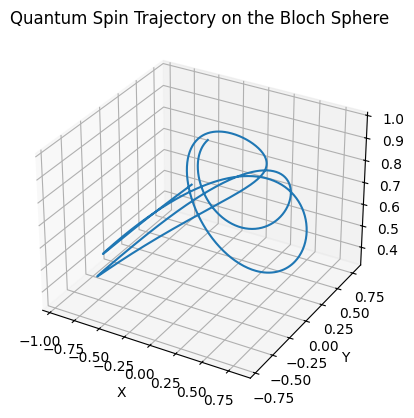

In [3]:
# Function to compute expectation values of Pauli matrices
def expectation_values(states):
    x_vals = [np.real(np.conj(state) @ (sigma_x @ state)) for state in states]
    y_vals = [np.real(np.conj(state) @ (sigma_y @ state)) for state in states]
    z_vals = [np.real(np.conj(state) @ (sigma_z @ state)) for state in states]
    return np.array(x_vals), np.array(y_vals), np.array(z_vals)

# Compute expectation values
x_vals, y_vals, z_vals = expectation_values(evolved_states)

# Plot the Bloch sphere trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals, y_vals, z_vals)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quantum Spin Trajectory on the Bloch Sphere')
plt.show()


## Conclusion

In this notebook, we simulated the time evolution of a quantum spin-1/2 particle in a time-varying magnetic field. The Bloch sphere visualization allowed us to observe how the spin state precesses due to the combined effects of the constant and oscillating magnetic fields.

This basic model can be extended in various ways, including adding noise or decoherence to simulate real-world conditions in quantum sensing applications.


## Simulating Decoherence with Noise

In real-world quantum systems, interactions with the environment can cause the quantum states to lose coherence, a phenomenon


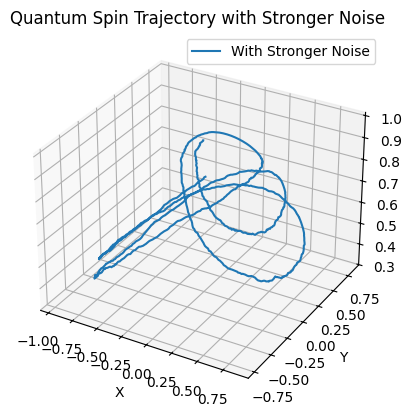

In [5]:
import numpy as np

# Adding random noise to the magnetic field
def noisy_magnetic_field(t, noise_strength=0.5):
    # Generate fresh random noise at each time step
    noise = noise_strength * (np.random.random(3) - 0.5)  # Noise between -0.25 and 0.25
    # Apply noise directly to the Pauli matrices
    H_noise = noise[0] * sigma_x + noise[1] * sigma_y + noise[2] * sigma_z
    # Return the magnetic field Hamiltonian plus noise
    return B0 * sigma_z + B1 * np.cos(omega * t) * sigma_x + H_noise

# Evolve the state with noisy magnetic field
def evolve_state_with_noise(state, times, noise_strength=0.5):
    evolved_states = []
    for t in times:
        H_t = noisy_magnetic_field(t, noise_strength)  # Generate noisy Hamiltonian
        U_t = expm(-1j * H_t * dt)  # Time evolution operator
        state = U_t @ state  # Evolve the state
        evolved_states.append(state)
    return np.array(evolved_states)

# Simulate with stronger noise
evolved_states_with_stronger_noise = evolve_state_with_noise(initial_state, times, noise_strength=0.5)

# Compute the expectation values with stronger noisy evolution
x_vals_noisy_strong, y_vals_noisy_strong, z_vals_noisy_strong = expectation_values(evolved_states_with_stronger_noise)

# Plot the noisy trajectory on the Bloch sphere with stronger noise
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals_noisy_strong, y_vals_noisy_strong, z_vals_noisy_strong, label='With Stronger Noise')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quantum Spin Trajectory with Stronger Noise')
plt.legend()
plt.show()



## Simulating Rabi Oscillations

**Rabi oscillations** occur when a quantum system is driven by an external oscillating field. For a two-level system, such as a spin-1/2 particle in a magnetic field, this results in the population of the two states oscillating as a function of time.

We will simulate Rabi oscillations by applying a magnetic field oscillating at a resonant frequency, causing the spin to oscillate between the up and down states.


## Understanding Rabi Oscillations

### What Are Rabi Oscillations?

**Rabi oscillations** describe the coherent oscillation of a two-level quantum system when it is driven by an external oscillating field. In our case, the two levels are the spin-up and spin-down states of a spin-1/2 particle (such as an electron), and the oscillating field is a time-dependent magnetic field along the x-axis.

### The Hamiltonian for Rabi Oscillations

For a quantum spin-1/2 particle in an oscillating magnetic field along the x-axis, the Hamiltonian is given by:

$$
\hat{H}(t) = \gamma B_1 \cos(\omega_{\text{Rabi}} t) \hat{\sigma}_x
$$

where:
- $ \gamma $ is the gyromagnetic ratio,
- $ B_1 $ is the amplitude of the oscillating magnetic field,
- $ \omega_{\text{Rabi}} $ is the frequency of the applied magnetic field,
- $ \hat{\sigma}_x $ is the Pauli matrix along the x-axis.

### Resonance Condition

Rabi oscillations are most prominent when the frequency of the applied magnetic field $ \omega_{\text{Rabi}} $ matches the natural transition frequency of the system. For our spin-1/2 particle, this transition frequency corresponds to the energy difference between the spin-up and spin-down states, which is driven by the constant magnetic field $ B_0 $ along the z-axis.

In resonance, the system will oscillate between the spin-up and spin-down states, with the probability of finding the particle in one state or the other oscillating as a function of time.

### Time Evolution and Probability of Spin States

The time evolution of the quantum state is governed by the Schrödinger equation:

$$
i \hbar \frac{d}{dt} \psi(t) = \hat{H}(t) \psi(t)
$$

For a system driven by the Rabi Hamiltonian, the state $ \psi(t) $ will oscillate between the spin-up and spin-down states, and the probability $ P_{\uparrow}(t) $ of finding the particle in the spin-up state will vary over time as:

$$
P_{\uparrow}(t) = \cos^2\left( \frac{\Omega_R t}{2} \right)
$$

where $ \Omega_R = \gamma B_1 $ is the **Rabi frequency**, which determines the rate of oscillation between the two states.

### Visualization of Rabi Oscillations

By evolving the quantum state under the Rabi Hamiltonian, we can visualize the **Rabi oscillations** either through the probability of finding the system in the spin-up state or by plotting the trajectory of the quantum state on the **Bloch sphere**.

In resonance, the system will undergo complete oscillations between the spin-up and spin-down states, and the trajectory on the Bloch sphere will trace out a path from the north pole (spin-up) to the south pole (spin-down) and back, showing periodic behavior.


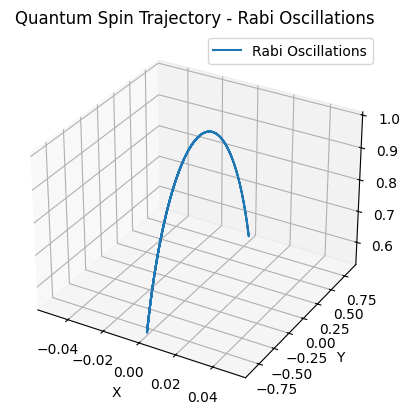

In [6]:
# Function to simulate a resonant magnetic field for Rabi oscillations
def magnetic_field_rabi(t, omega_rabi):
    # Resonant magnetic field along the x-axis
    return B1 * np.cos(omega_rabi * t) * sigma_x

# Function to evolve the state during Rabi oscillations
def evolve_state_rabi(state, times, omega_rabi):
    evolved_states = []
    for t in times:
        H_t = magnetic_field_rabi(t, omega_rabi)
        U_t = expm(-1j * H_t * dt)
        state = U_t @ state
        evolved_states.append(state)
    return np.array(evolved_states)

# Define Rabi frequency (set this to be close to the resonant frequency of the system)
omega_rabi = omega

# Simulate Rabi oscillations
evolved_states_rabi = evolve_state_rabi(initial_state, times, omega_rabi)

# Compute the expectation values during Rabi oscillations
x_vals_rabi, y_vals_rabi, z_vals_rabi = expectation_values(evolved_states_rabi)

# Plot the Rabi oscillations on the Bloch sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals_rabi, y_vals_rabi, z_vals_rabi, label='Rabi Oscillations')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quantum Spin Trajectory - Rabi Oscillations')
plt.legend()
plt.show()


## Comparing Noise and Rabi Oscillations

Now that we have implemented both **decoherence (noise)** and **Rabi oscillations**, we can compare the behavior of the spin system under these two different scenarios.


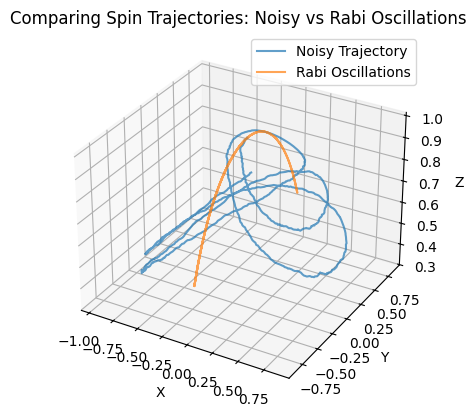

In [8]:
# Plot both noisy and Rabi oscillation trajectories on the same Bloch sphere

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Noisy trajectory (from the stronger noise simulation)
ax.plot(x_vals_noisy_strong, y_vals_noisy_strong, z_vals_noisy_strong, label='Noisy Trajectory', alpha=0.7)

# Rabi oscillations trajectory (already computed in the Rabi part)
ax.plot(x_vals_rabi, y_vals_rabi, z_vals_rabi, label='Rabi Oscillations', alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Comparing Spin Trajectories: Noisy vs Rabi Oscillations')
plt.legend()
plt.show()


## Conclusion: Comparing Noisy Trajectories with Rabi Oscillations

In this section, we compared the behavior of a spin-1/2 quantum system under two different conditions: one with environmental noise and the other under ideal conditions with **Rabi oscillations**.

- The **noisy trajectory** (blue) represents a more chaotic evolution due to the random fluctuations (decoherence) introduced by environmental noise. In real-world quantum systems, such interactions with the environment lead to a loss of coherence, causing the quantum states to evolve in an unpredictable manner.

- The **Rabi oscillations** (orange), on the other hand, showcase the clean, periodic behavior of a spin system driven by an external oscillating field at resonance. In this case, the spin coherently oscillates between the up and down states, tracing a smooth path on the Bloch sphere.

The comparison between the two trajectories highlights the challenge of maintaining coherence in quantum systems. While ideal oscillations (like the Rabi case) are desirable in quantum sensing and quantum computing applications, the influence of noise from the environment needs to be mitigated through techniques such as error correction, pulse sequences (e.g., spin echo), and optimized system design.

This demonstrates the delicate balance needed to achieve reliable quantum operations in practical applications, where noise and decoherence are unavoidable.
